# Is Crime correlated to Wages?
by Charan Sridhar

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import mod
import mpld3

In [230]:
#gdp_data = pd.read_csv("/Users/charan/Documents/website/gdp_vs_crime/gdp_oecd.csv")
crime_data = pd.read_csv("/Users/charan/Documents/website/wages_vs_crime/state_crime.csv")
wage_data  = pd.read_csv("/Users/charan/Documents/website/wages_vs_crime/1929_2021_state_wage_2.csv")
inflation_data = pd.read_csv('/Users/charan/Documents/website/wage_v_inflation/Inflation(CPI)(7_21_22).csv')

**I will now be exploring the data to get a better understanding of the datasets**

In [231]:
#gdp_data.head()

In [232]:
#gdp_data.shape

In [254]:
crime_data.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [234]:
#crime_data.shape

In [252]:
wage_data.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1929,1930,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,United States,NaN,SAINC1,1,...,Personal income (millions of dollars),Millions of dollars,85151,76394,...,14003346.0,14189228.0,14969527.0,15681233.0,16092713.0,16845028.0,17681159.0,18402004.0,19607447.0,21056621.9
1,0,United States,NaN,SAINC1,2,...,Population (persons) 1/,Number of persons,121769000,123075000,...,314344331.0,316735375.0,319270047.0,321829327.0,324367742.0,326623063.0,328542157.0,330233102.0,331501080.0,331893745.0
2,0,United States,NaN,SAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,699,621,...,44548.0,44798.0,46887.0,48725.0,49613.0,51573.0,53817.0,55724.0,59147.0,63444.0
3,1000,Alabama,5.0,SAINC1,1,...,Personal income (millions of dollars),Millions of dollars,843.2,697.5,...,173361.7,175185.3,181078.8,189115.4,192363.5,199336.4,207053.6,215930.4,228748.8,244975.8
4,1000,Alabama,5.0,SAINC1,2,...,Population (persons) 1/,Number of persons,2644000,2647000,...,4839261.0,4864399.0,4886793.0,4908162.0,4930595.0,4952202.0,4976395.0,5003418.0,5024803.0,5039877.0


In [236]:
#wage_data.shape

In [ ]:
wag_data

In [237]:
#inflation_data.head()

In [238]:
#inflation_data.shape

In [239]:
def curate_wage_data(state):
    c_wage_data = wage_data[wage_data["GeoName"].str.contains(state)]
    c_wage_data = c_wage_data[c_wage_data["Description"].str.contains("Per capita personal income")]
    c_wage_data=c_wage_data.loc[0:]
    return c_wage_data

#curate_wage_data("Alabama")

In [240]:
def curate_state_data(state):
    ac_state_data = crime_data[crime_data["State"].str.contains(state)]
    fc_state_data=pd.DataFrame()
    fc_state_data["Year"] = ac_state_data["Year"]
    fc_state_data["Values"] = ac_state_data["Data.Rates.Property.All"]+ac_state_data["Data.Rates.Violent.All"]
    fc_state_data.iloc[53,1]=np.nan
    fc_state_data.iloc[54,1]=np.nan
    fc_state_data.iloc[55,1]=np.nan
    fc_state_data["Values"] = fc_state_data["Values"].interpolate()
    #print(fc_state_data["Year"].isnull().values.any())
    fc_state_data["Year"]=[str(int(d)) for d in fc_state_data["Year"]]
    fc_state_data["Values"]=[int(d) for d in fc_state_data["Values"]]
    return fc_state_data

In [241]:
def curate_inflation_data(country):
    c_inflation_data = inflation_data[inflation_data["LOCATION"].str.endswith(country)]
    c_inflation_data = c_inflation_data[c_inflation_data["MEASURE"].str.endswith("IDX2015")]
    c_inflation_data = c_inflation_data[c_inflation_data["FREQUENCY"].str.endswith("A")]
    c_inflation_data = c_inflation_data[c_inflation_data["SUBJECT"].str.endswith("TOT")]
    return c_inflation_data
a=curate_inflation_data("USA")
a=a[a["TIME"].str.contains("2018")]["Value"]
#a

In [73]:
def graph_all(state):
    fig,ax = plt.subplots(figsize=(15,17))
    plt.style.use('fivethirtyeight')
    ###################
    ###crime vs time###
    ###################
    plt.subplot(3,1,1)
    c_crime_data=curate_state_data(state)
    c_wage_data=curate_wage_data(state)
    Xc = c_crime_data["Year"].values
    Yc = c_crime_data["Values"].values
    wtime = c_crime_data["Year"].values
    startpos=0
    istart = 1929
    wstart = int(wtime[0])
    if(istart>wstart):
        while(wstart<istart):
            startpos+=1
            wstart+=1
        Xc=Xc[startpos:]
        Yc=Yc[startpos:]
    Xcs=[str(int(d)) for d in Xc]
    Xcd=[pd.to_datetime(d) for d in Xc]
    plt.xlabel("Year")
    plt.ylabel("Crimes per 100,000 people")
    plt.title("Crime Rate of "+state)
    plt.plot(Xcd,Yc)
    ###################
    ###wage vs time####
    ###################
    c_inflation_data=curate_inflation_data("USA")
    plt.subplot(3,1,2)
    Yg=[c_wage_data[str(d)] for d in Xc]
    c=0
    for i in Xc:
        a=c_inflation_data[c_inflation_data["TIME"].str.contains(str(i))]["Value"]
        a=float(a)
        Yg[c]=(Yg[c]/a)*100
        #print(Yg[c])
        c+=1
    plt.title("Average Wage per Capita in "+state)
    plt.ylabel("Pay in 2015 USD")
    plt.xlabel("Year")
    plt.plot(Xcd,Yg)
    ###################
    ###wage vs crime###
    ###################
    plt.subplot(3,1,3)
    plt.scatter(Yg,Yc)
    Yg=np.array(Yg)
    a=[]
    #print(Yg)
    for b in Yg:
        a.append(b[0])
    #print(a)
    coef = np.polyfit(a,Yc,1)
    poly1d_fn = np.poly1d(coef) 
    plt.plot(a,poly1d_fn(a),'--k')
    plt.xlabel("Wages in 2015 USD")
    plt.ylabel("Crimes per 100,000 people")
    plt.title("Wages vs Crime rate of "+state)
    #plt.show()
    html_str = mpld3.fig_to_html(fig,)
    Html_file= open(state+".html","w")
    Html_file.write(html_str)
    Html_file.close()
    print("Correlation: " + str(np.corrcoef(a,Yc)[0,1]))



Correlation: -0.5340992743955145


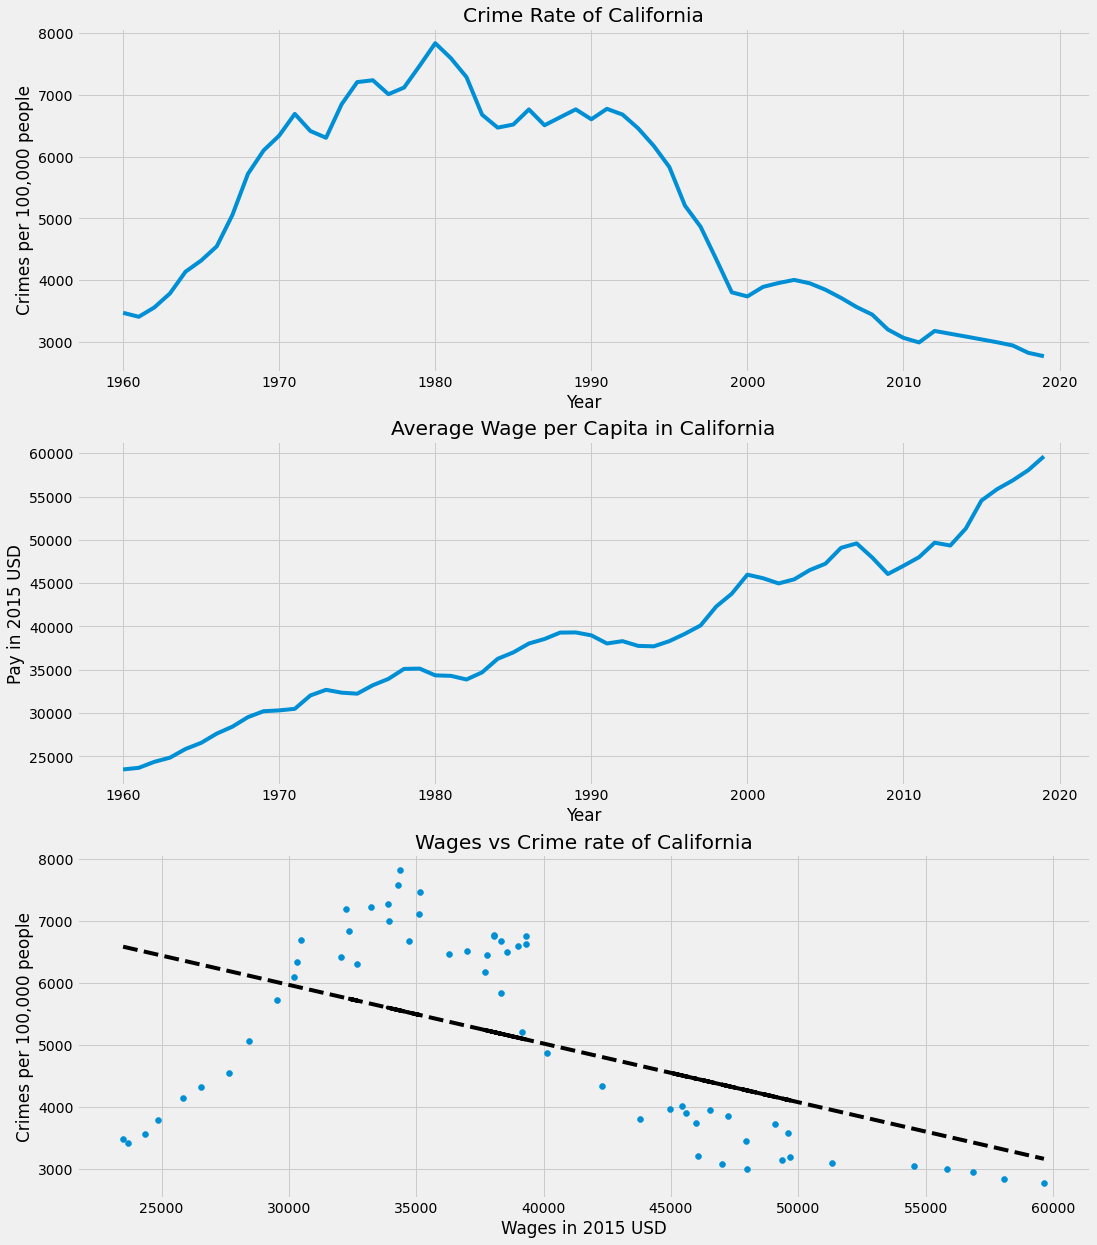

In [255]:
graph_all("California")

Correlation: -0.16144899593173284


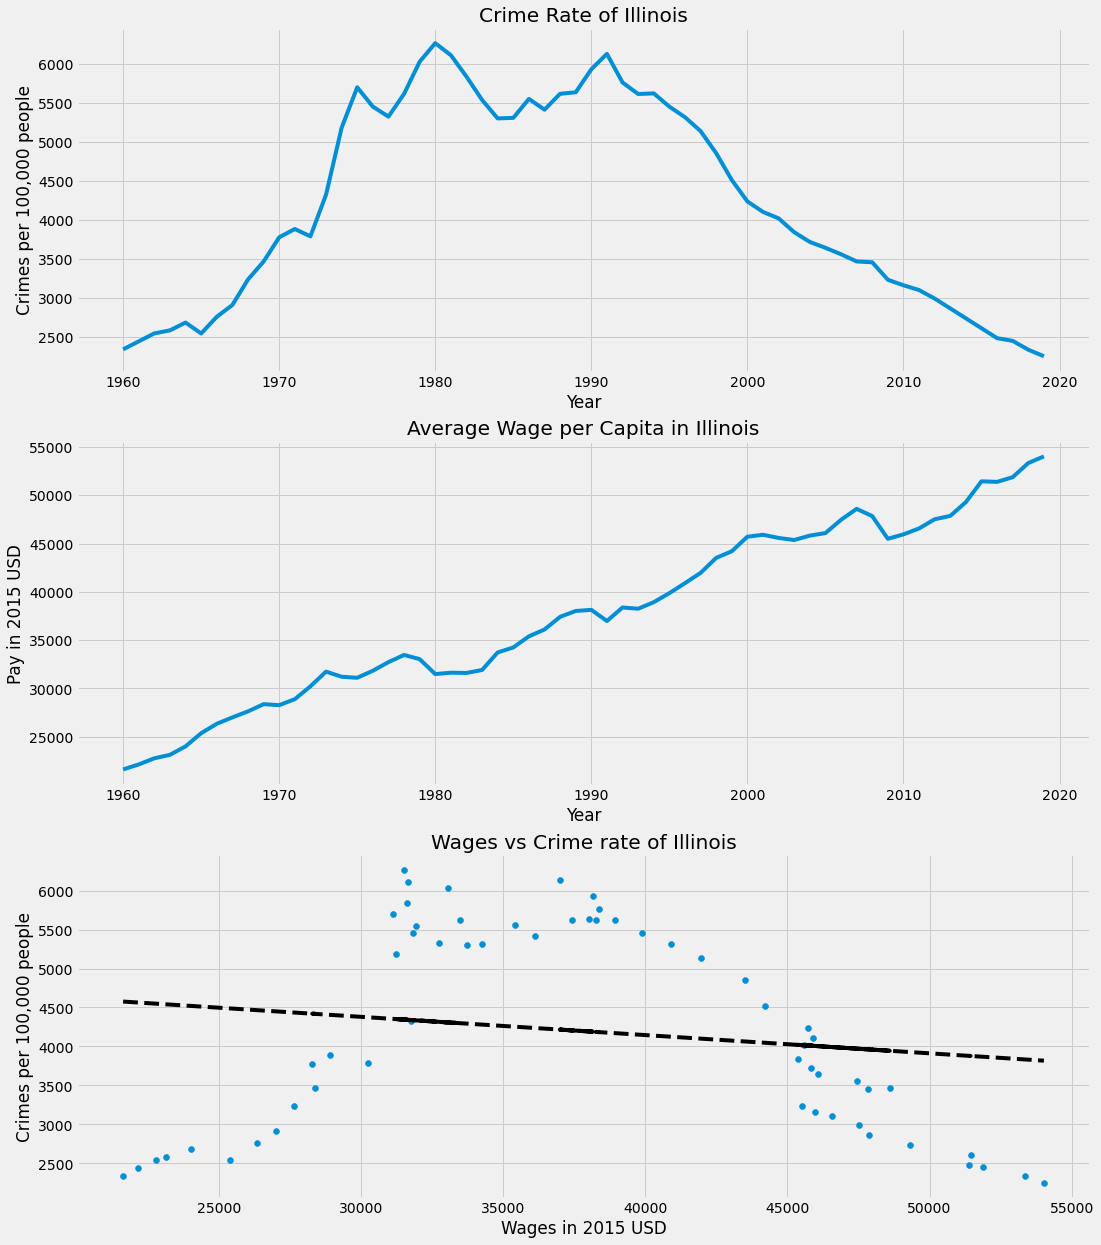

In [265]:
graph_all("Illinois")